# Scikit-learn Toy Dataset Project

![img](https://gaussian37.github.io/assets/img/ml/sklearn/sklearn.png)

Scikit-learn에서 기본 제공하는 Toy Dataset을 활용해 분류기를 만들어보자.

우리가 사용할 데이터는 아래와 같다.

- `load_digits` : 손글씨 이미지 데이터
- `load_wine` : 와인 데이터
- `load_breast_cancer` : 유방암 데이터

## 1. Load_Digits : 손글씨 분류

### 1. 1 데이터 준비하기

먼저 scikit-learn에서 기본 제공하는 데이터를 불러와 준비하자.


필요한 모듈들을 import 해준다.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

digits = load_digits()

불러온 데이터의 key를 확인해보자.

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digits_data = digits.data
digits_target = digits.target

`digits_data`에는 feature들이, `digits_target`에는 target들이 들어있다.

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

digits의 데이터 자체가 숫자 손글씨에 대한 내용이므로, target은 0부터 9까지의 숫자를 가지고 있다.

한번 우리의 데이터를 조금 출력해보자. 

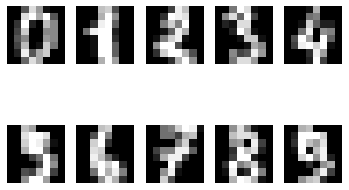

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

너무 사진 퀄리티가 낮긴 하지만, 제대로 0부터 9까지의 숫자라는 것을 알 수 있다.

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

digits 데이터에 대한 설명은 `digits.DESCR`라는 문장을 통해서 수행할 수 있다.

이제 train 데이터와 test 데이터로 분리하여 데이터 준비를 마무리하도록 하자.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    digits_data, digits_target, test_size = 0.2, random_state = 7)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


### 1. 2 데이터 학습하기

이제 준비한 데이터들을 여러 classifier에 넣어 학습시켜보자.

#### 1.2.1 Decision Tree

먼저 의사결정나무로 모델을 만들어보자.


In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

0.8555555555555555


#### 1.2.2 Random Forest

RandomForest를 활용한 모델을 만들어보자.

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

0.9638888888888889


#### 1.2.3 SVM

SVM을 활용한 모델을 만들어보자.

In [21]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

0.9888888888888889


#### 1.2.4 SGD Classifier

SGD를 활용한 모델도 만들어보자.

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.88      0.90      0.89        42
           2       0.95      1.00      0.98        40
           3       0.97      0.85      0.91        34
           4       0.97      0.97      0.97        37
           5       0.85      1.00      0.92        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.83      0.91      0.87        43
           9       0.96      0.75      0.84        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

0.9305555555555556


#### 1.2.5 Logistic Regression

로지스틱 회귀 모델을 만들어보자.

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

0.9527777777777777


/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 1.3 Conclusion

결과를 확인해보면 아래와 같다.

|Classifier|Accuracy|
|:---:|:---:|
|Decision Tree|0.85|
|Random Forest|0.96|
|SVM|0.98|
|SGD|0.93|
|Logistic Classifier|0.95|

일단 정확도를 정리해보았다. 전체적으로 모델이 나쁘지 않은데, **SVM** 모델을 선택하는 것이 가장 현명할 것 같다.

그리고 오차를 판별하는 기준은, 손글씨는 참인지 아닌지, 혹은 negative에 critical한지를 고려해보았을 때 precision, recall 등 보다는 **accuracy**로 선택하는 것이 좋은 선택이 될 것 같다.

## 2. 와인 분류하기

이번에는 scikit-learn에 있는 와인 데이터셋을 이용하여 분류기를 만들어보자.

### 2.1 데이터 불러오기

먼저 필요한 데이터를 모두 불러오자.

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [31]:
print(wine.data.shape)
print(wine.data)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


와인 데이터를 살펴보면 총 178개의 데이터가 있고, 13개의 feature로 이루어진 것을 알 수 있다.

In [35]:
print(wine.target.shape)
print(wine.target)

(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


wine의 target 데이터도 마찬가지로 총 178개, 그리고 0, 1, 2 세가지 범주로 이루어진 것을 알 수 있다.

In [65]:
print(wine.target_names)
print(wine.DESCR)

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

In [36]:
wine_data = wine.data
wine_target = wine.target

In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    wine_data,
    wine_target,
    test_size = 0.2,
    random_state = 7)

print("X_train : {}, X_test : {}".format(x_train.shape, x_test.shape))

X_train : (142, 13), X_test : (36, 13)


train data와 test data로 제대로 분류하였다. 이제 이 데이터들을 가지고 모델을 학습시켜보자.

### 2.2 모델 학습하기

#### 2.2.1 Decision Tree

의사결정나무로 모델을 만들어보자.

In [40]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### 2.2.2 RandomForest

RandomForest로 모델을 만들어보자.

In [41]:
random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 2.2.3 SVM

SVM 모델로 만들어보자.

In [43]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.6111111111111112
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### 2.2.4 SGD Classifier

SGD Classifier를 적용해보자.

In [44]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.6111111111111112
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.65      0.88      0.75        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.40      0.63      0.48        36
weighted avg       0.41      0.61      0.49        36



/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.2.5 Logistic Regression

로지스틱 회귀 모델에 대해서도 한번 적용해보자.

In [45]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 2.3 Conclusion
결과를 확인해보면 아래와 같다.

|Classifier|Accuracy|
|:---:|:---:|
|Decision Tree|0.94|
|Random Forest|1.0|
|SVM|0.611|
|SGD|0.972|
|Logistic Classifier|0.95|

**Random Forest** 모델이 미쳤다. 정확도가 1이 나온다 ^^; Random Forest 모델을 선택해주는 것이 적절한 선택이 될 것 같다.

이 와인 분류기도 마찬가지로, **accuracy**로 선택해주는 것이 좋을 것 같다.

## 3. 유방암 여부 진단

이번에는 유방암 여부를 진단해보자.
이 데이터 또한 여러 사람의 건강 지표에 대한 데이터가 feature로 들어가있고, 유방암 여부가 True, False의 label로 되어있다.

### 3.1 데이터 불러오기

In [46]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [47]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [54]:
print(breast_cancer.feature_names)
print(breast_cancer.data[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


유방암 데이터는 위와 같은 10가지의 feature로 구성되어있고 이는 숫자로 나타내어진다.

In [57]:
print(breast_cancer.target_names)
print(breast_cancer.target[:30])

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


target 데이터는 malignant, benign으로 되어있고 이는 0과 1로 표현되어 있다.

In [66]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 3.1.1 train 데이터와 test 데이터 분리하기

살펴본 데이터들을 train 데이터와 test 데이터로 분리해보자.

In [59]:
x_train, x_test, y_train, y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    random_state = 10,
    test_size = 0.2)

print("X Train : {}, X Test : {}".format(x_train.shape, x_test.shape))

X Train : (455, 30), X Test : (114, 30)


이제 이 값들을 바탕으로 classifier를 설계해보도록 하자.

### 3.2 모델 학습하기

#### 3.2.1 Decision Tree

의사결정나무로 모델을 만들어보자.

In [60]:
decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9122807017543859
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.97      0.89      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



#### 3.2.2 Random Forest

Random Forest 모델로 만들어보자.

In [61]:
random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9824561403508771
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 3.2.3 SVM

SVM을 이용하여 모델을 만들어보자.

In [62]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9210526315789473
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



#### 3.2.4 SGD Classifier

SGD Classifier를 사용해서 모델을 만들어보자.

In [63]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9210526315789473
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



#### 3.2.5 Logistic Regression

로지스틱 회귀 모델을 사용해서 만들어보자.

In [64]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9298245614035088
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3.3 Conclusion

결과를 한번 확인해보자!

|Classifier|Accuracy|Recall|
|:---:|:---:|:---:|
|Decision Tree|0.91|0.92|
|Random Forest|0.98|0.99|
|SVM|0.92|0.90|
|SGD|0.92|0.90|
|Logistic Classifier|0.93|0.93|

먼저, 유방암을 진단하는 경우에는 실제 환자를 한명이라도 놓치면 안된다. 즉, 양성을 음성으로 판단하면 안되기 때문에 **Recall**이 훨씬 중요하다.

그래서 Recall에서 가장 높은 값을 가지고 있는 **SVM**모델을 선택하는 것이 현명한 방법이 될 것이다.